In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
customer=pd.read_table('C:/Users/ACER/Desktop/Python _case_study/Customer.csv',sep=',')
product=pd.read_table('C:/Users/ACER/Desktop/Python _case_study/prod_cat_info.csv',sep=',')
transaction=pd.read_table('C:/Users/ACER/Desktop/Python _case_study/Transactions.csv',sep=',')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
### keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
Customer_1=pd.merge(left=transaction,right=customer,left_on='cust_id',right_on='customer_Id',how='left' ,indicator=True)

In [4]:
Customer_Final=pd.merge(left=Customer_1,right=product,left_on=['prod_subcat_code','prod_cat_code'],right_on=['prod_sub_cat_code','prod_cat_code'],how='left')

In [5]:
Customer_Final.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,both,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0,both,Electronics,5,Computers


In [6]:
#convert dob to datetime64

Customer_Final['DOB']=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')

In [7]:
#convert  tran_date to datetime64
#Dear Evalutor,
#just try to slove by hit and trail method.But don't know why format is not working here.Please explain while checking?

Customer_Final['tran_date']=pd.to_datetime(Customer_Final.tran_date)

In [8]:
#droping duplicate columns
Customer_Final.drop(columns=['customer_Id','prod_sub_cat_code'],inplace=True)

In [9]:
Customer_Final.drop_duplicates(inplace=True)

In [10]:
Customer_Final.dropna(axis=0,inplace=True)

### 2. Prepare a summary report for the merged data set.
#### a. Get the column names and their corresponding data types

In [11]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23023 entries, 0 to 23052
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23023 non-null  int64         
 1   cust_id           23023 non-null  int64         
 2   tran_date         23023 non-null  datetime64[ns]
 3   prod_subcat_code  23023 non-null  int64         
 4   prod_cat_code     23023 non-null  int64         
 5   Qty               23023 non-null  int64         
 6   Rate              23023 non-null  int64         
 7   Tax               23023 non-null  float64       
 8   total_amt         23023 non-null  float64       
 9   Store_type        23023 non-null  object        
 10  DOB               23023 non-null  datetime64[ns]
 11  Gender            23023 non-null  object        
 12  city_code         23023 non-null  float64       
 13  _merge            23023 non-null  category      
 14  prod_cat          2302

#### b. Top 10 observations

In [12]:
Customer_Final.head(n=10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,_merge,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,both,Clothing,Women
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,both,Electronics,Computers
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,both,Books,DIY
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,both,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,both,Books,DIY
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,both,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,both,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,both,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,both,Clothing,Kids
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,both,Electronics,Personal Appliances


#### b. Bottom 10 observations

In [13]:
Customer_Final.tail(n=10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,_merge,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,both,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,both,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,both,Books,DIY
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,both,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,both,Footwear,Kids
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,both,Books,Academic
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,both,Clothing,Mens
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,both,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,both,Books,Children
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,both,Books,Children


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
cont_var=[ 'Qty', 'Rate', 'Tax', 'total_amt']
data_cont_var=Customer_Final[cont_var]

In [15]:
data_cont_var.describe()

,Qty,Rate,Tax,total_amt
count,23023.000000,23023.000000,23023.000000,23023.000000
mean,2.435868,637.116840,248.701263,2109.881471
std,2.264415,621.870539,187.196950,2505.929444
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1756.950000
75%,4.000000,1110.000000,365.820000,3570.255000
max,5.000000,1500.000000,787.500000,8287.500000


#### d. Frequency tables for all the categorical variables

In [16]:
var=['Qty', 'Rate', 'Tax', 'total_amt','tran_date','DOB']
cat=Customer_Final.columns.difference(var)
Customer_Final[cat]=Customer_Final[cat].astype(str)
Customer_Final.select_dtypes('object').describe()


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,Gender,city_code,_merge,prod_cat,prod_subcat
count,23023,23023,23023,23023,23023,23023,23023,23023,23023,23023
unique,20862,5502,12,6,4,2,10,1,6,18
top,32263938079,268819,4,5,e-Shop,M,4.0,both,Books,Women
freq,4,13,3999,6061,9299,11798,2422,23023,6061,3044


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [17]:
cont_variables=Customer_Final.loc[:,cont_var]
cont_variables.head(2)

,Qty,Rate,Tax,total_amt
0,-5,-772,405.300,-4265.300
1,-5,-1497,785.925,-8270.925


#### Continuous variables

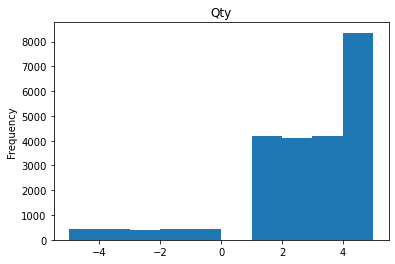

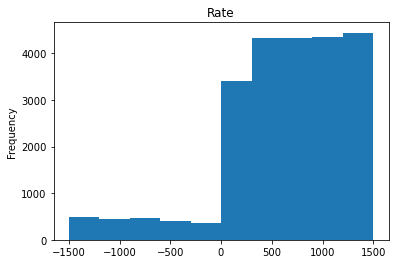

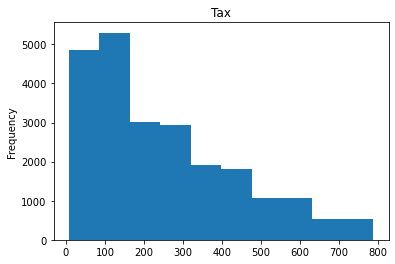

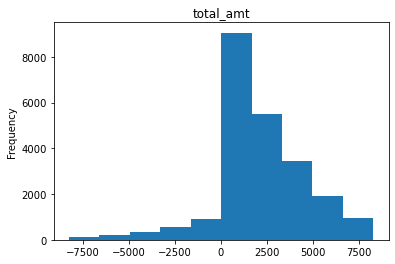

In [18]:
for i in cont_variables.columns:
    cont_variables[i].plot(kind='hist')
    plt.title(i)
    plt.show()

#### categorical variable bar garphs

In [19]:
cate_var=Customer_Final.loc[:,(Customer_Final.dtypes=='object')]
cate_var=cate_var.dropna()
cate_var.head(2)


,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Store_type,Gender,city_code,_merge,prod_cat,prod_subcat
0,80712190438,270351,1,1,e-Shop,M,5.0,both,Clothing,Women
1,29258453508,270384,5,3,e-Shop,F,8.0,both,Electronics,Computers


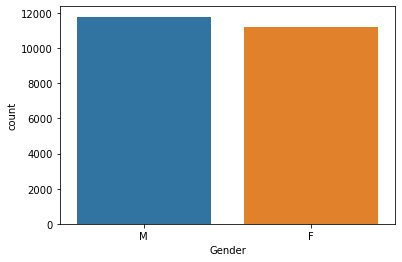

In [20]:
sns.countplot(cate_var.Gender)
plt.show()

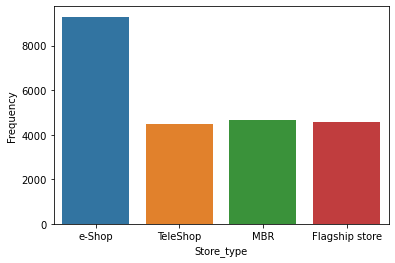

In [21]:
sns.countplot(cate_var.Store_type)
plt.ylabel('Frequency')
plt.xlabel('Store_type')
plt.show()

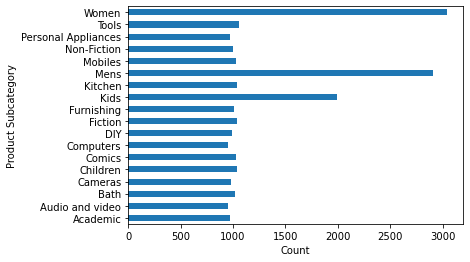

In [22]:
cate_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

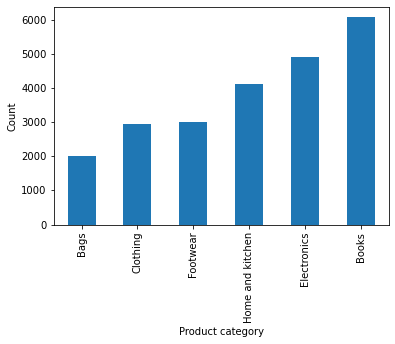

In [23]:
prod_cate=cate_var.groupby('prod_cat')['prod_cat'].count()
prod_cate.sort_values().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Product category')
plt.show()

### 4. Calculate the following information using the merged dataset
#### (a). Time period of the available transaction data

In [24]:
# 4. Calculate the following information using the merged dataset
# a. Time period of the available transaction data
First_date=Customer_Final.tran_date.min().date()
Last_date=Customer_Final.tran_date.max().date()
print('Time period of the available Transaction is from',First_date,'to',Last_date)

Time period of the available Transaction is from 2011-01-02 to 2014-12-02


### 4(b). Count of transactions where the total amount of transaction was negative

In [25]:
Customer_Final.transaction_id.loc[Customer_Final.total_amt<0].count()

2163

### 5. Analyze which product categories are more popular among females vs male customers

In [26]:
popular=Customer_Final.groupby(by=['Gender','prod_cat'])['Qty'].sum().reset_index()
popular=popular.pivot(index='Gender',columns='prod_cat',values='Qty')
popular
#Books are the most popular product categories among females and males 

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5827,3721,4898
M,2345,7586,3748,6480,3561,5046


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [27]:
max_cust=Customer_Final.groupby(by='city_code')['cust_id'].count().reset_index().sort_values(by='cust_id',ascending=False)
Tota_cust=max_cust.cust_id.sum()
max_cust['%cust']=max_cust.cust_id/Tota_cust*100
max_cust['%cust']=max_cust['%cust'].round(0)
max_cust.head(1)

,city_code,cust_id,%cust
4,4.0,2422,11.0


### 7. Which store type sells the maximum products by value and by quantity?

In [28]:
best_store=Customer_Final.groupby(by='Store_type')[['Qty','total_amt']].sum().round(0).sort_values(by='total_amt',ascending=False).reset_index()
best_store

,Store_type,Qty,total_amt
0,e-Shop,22785,19838945.0
1,Flagship store,11140,9720710.0
2,MBR,11188,9667756.0
3,TeleShop,10968,9348391.0


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [29]:

table=Customer_Final.groupby(by=['prod_cat','Store_type'])['total_amt'].sum().sort_values().reset_index()
table=table.pivot_table(index='Store_type',columns='prod_cat',values='total_amt')
print('Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores',table.loc['Flagship store',['Clothing','Electronics']])

Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores prod_cat
Clothing       1194423.23
Electronics    2214512.82
Name: Flagship store, dtype: float64


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [30]:
table2=Customer_Final.groupby(by=['prod_cat','Gender'])['total_amt'].sum().sort_values().reset_index()
table2=table2.pivot_table(index='Gender',columns='prod_cat',values='total_amt')
print('Total amount earned from "Male" customers under the "Electronics" category is ',table2.loc['M','Electronics'])

Total amount earned from "Male" customers under the "Electronics" category is  5705871.925000019


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [45]:
t2=Customer_Final.loc[Customer_Final.total_amt>0]
t2.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,_merge,prod_cat,prod_subcat
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,1973-05-11,F,8.0,both,Electronics,Computers
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1986-10-13,M,1.0,both,Home and kitchen,Tools


In [51]:
#there is no duplicated transaction_id which means all are unique
t2.transaction_id.duplicated().sum()

0

In [69]:
unique=t2.groupby(by='cust_id')['transaction_id'].count().reset_index()
print('There are ',unique.cust_id.loc[unique.transaction_id>10].count(),'customer ID having more than 10 unique transaction id')

There are  6  customer ID having more than 10 unique transaction id


### 11. For all customers aged between 25 - 35, find out:
#### (a) What was the total amount spent for 'Electronics' and 'Books' product categories?

In [85]:


Customer_Final['Age']=Customer_Final.tran_date.dt.year-Customer_Final.DOB.dt.year
Customer_Final['Age_cat']=pd.cut(Customer_Final.Age,bins=[25,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)


In [94]:
Customer_Final.total_amt.loc[(Customer_Final.Age_cat=='25-35')&((Customer_Final.prod_cat=='Electronics')|(Customer_Final.prod_cat=='Books'))].sum()

11233848.795

### (b) What was the total amount spent by these customers between 1st Jan 2014 to 1st Mar 2014?



In [134]:
z=Customer_Final.loc[(Customer_Final.Age_cat=='25-35') & (Customer_Final.tran_date>='2014-01-01 ')&(Customer_Final.tran_date<='2014-03-01 ')]
z.total_amt.sum()

685698.91